## **Classification of MNIST Handwritten Digits Using Machine Learning: A Comparative Analysis of Different Models**

In [46]:
#import Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [47]:
# Load the MNIST dataset
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

In [48]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [49]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


# Data Preprocessing

## **1. Data inspection and cleaning**

##### **1.1. Identifying and handling Missing Values **

In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to label
dtypes: int64(785)
memory usage: 359.3 MB


In [51]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, 0 to label
dtypes: int64(785)
memory usage: 59.9 MB


In [52]:
print("Missing values:\n", train_data.isnull().sum())

Missing values:
 0        0
1        0
2        0
3        0
4        0
        ..
780      0
781      0
782      0
783      0
label    0
Length: 785, dtype: int64


In [53]:
print("Missing values:\n", train_data.isnull().sum())

Missing values:
 0        0
1        0
2        0
3        0
4        0
        ..
780      0
781      0
782      0
783      0
label    0
Length: 785, dtype: int64


There is no missing in the dataset.SO, no need to handle them.

In [54]:
train_data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', 'label'],
      dtype='object', length=785)

In [55]:
# Identify columns
num_cols = []
cat_cols = []
#there is no need for this as there is only numerical columns.

##### **1.2. Checking Data Types of Columns in the Dataset **

In [56]:
# Check data types for all columns
print("\n" + "="*40)
print("Data Types of All Columns of train datset:")
print("="*40)
print(train_data.dtypes)


print("\n" + "="*40)
print("Data Types of All Columns of test datset:")
print("="*40)
print(test_data.dtypes)


Data Types of All Columns of train datset:
0        int64
1        int64
2        int64
3        int64
4        int64
         ...  
780      int64
781      int64
782      int64
783      int64
label    int64
Length: 785, dtype: object

Data Types of All Columns of test datset:
0        int64
1        int64
2        int64
3        int64
4        int64
         ...  
780      int64
781      int64
782      int64
783      int64
label    int64
Length: 785, dtype: object


##### **1.3. Identifying and handling Outliers **


In [57]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0,60000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0,4.453933
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0,2.889270
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0,9.000000


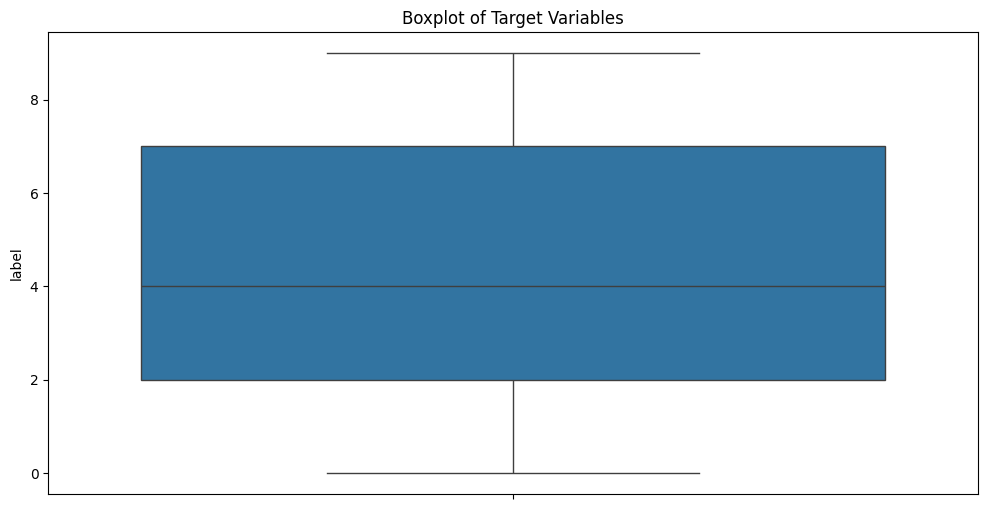

In [58]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train_data['label'])
plt.title("Boxplot of Target Variables")
plt.show()

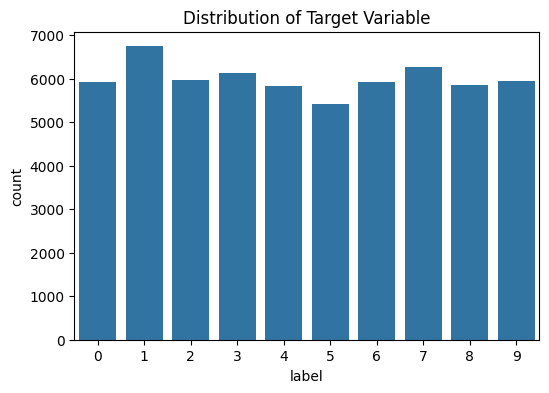

In [59]:
#Check the Distribution of Target (y)
plt.figure(figsize=(6,4))
sns.countplot(x=train_data['label'])
plt.title("Distribution of Target Variable")
plt.show()

There is no outlier in the dataset.

##### **1.4. Identifying and handling duplicate Values **

In [60]:
# Check for duplicate rows
duplicate_rows = train_data.duplicated()
print("Total Duplicate Rows:", duplicate_rows.sum())

Total Duplicate Rows: 0


## **2. Identifying and Encoding Categorical Features**

MNIST dataset does not have categorical features, so we don't need to perform categorical encoding like One-Hot Encoding or Label Encoding.

##Why?
* The MNIST dataset consists of grayscale images represented as numerical pixel values (0–255).
* The labels (0–9) are already numerical and don’t require encoding.

In [63]:
train_data.shape

(60000, 785)

In [64]:
# Split into features (X) and labels (y)
X_train = train_data.drop('label', axis=1).values  # Pixel values (784 columns)
y_train = train_data['label'].values               # Labels (0-9)
X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

The mnist_train.csv and mnist_test.csv files already contain separated training and testing data.That's why we not use the library train_test_split.

## **3. Data Normalization**

 We divided by 255 because it's fast and simple since pixel values are always between 0-255. MinMaxScaler isn't needed as it just adds extra computation

In [65]:
# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [66]:
# Define and train models, then evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=100),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'mlp': MLPClassifier(hidden_layer_sizes=(100,), max_iter=20)
}

In [67]:
# Train all models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model

In [68]:
results = {}  # Dictionary to store model names and their accura
# Test and evaluate models
for name, model in models.items():
    y_pred = model.predict(X_test)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    results[name] = accuracy  # Store accuracy for each model

    print(f'\n{name} Accuracy: {accuracy:.3f}')
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.926
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.91      0.88      0.89       892
           6       0.94      0.95      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.87      0.88      0.88       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000


KNN Accuracy: 0.969
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95     

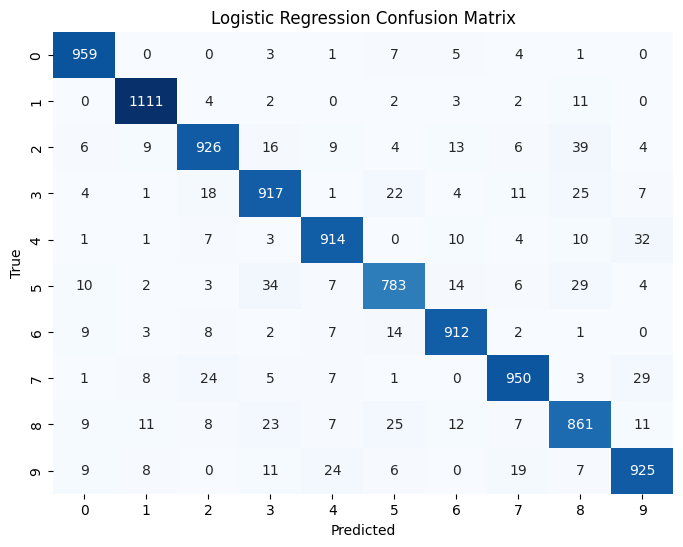

In [69]:
# confusion matrix for Logistic Regression
y_test = test_data['label']  # From Cell 3
y_pred_nb = models['Logistic Regression'].predict(X_test)  # From Cell 4
cm = confusion_matrix(y_test, y_pred_nb)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('Logistic_Regression_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

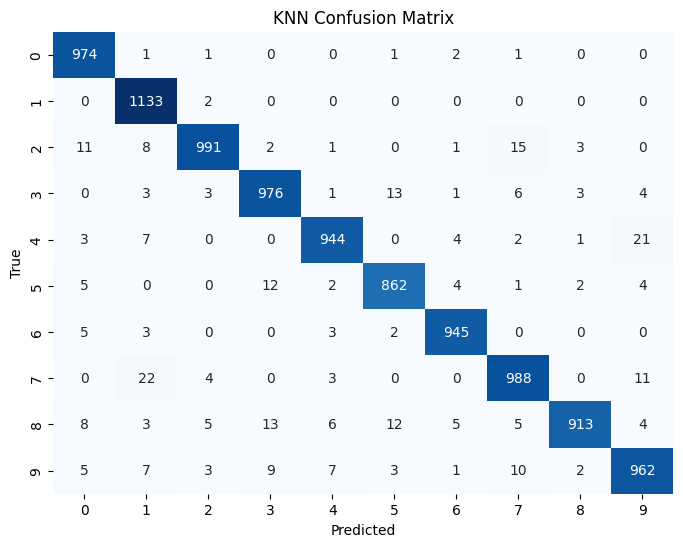

In [73]:
# confusion matrix for knn
y_test = test_data['label']  # From Cell 3
y_pred_nb = models['KNN'].predict(X_test)  # From Cell 4
cm = confusion_matrix(y_test, y_pred_nb)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('KNN_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

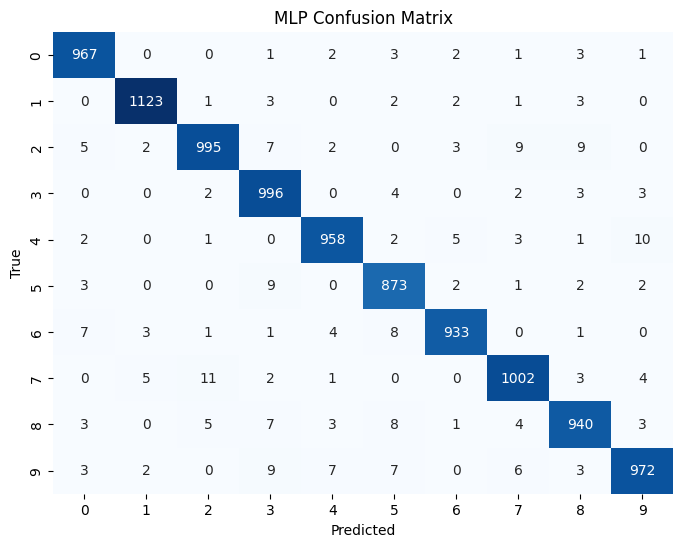

In [74]:
# confusion matrix for knn
y_test = test_data['label']  # From Cell 3
y_pred_nb = models['mlp'].predict(X_test)  # From Cell 4
cm = confusion_matrix(y_test, y_pred_nb)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('MLP Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('MLP_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

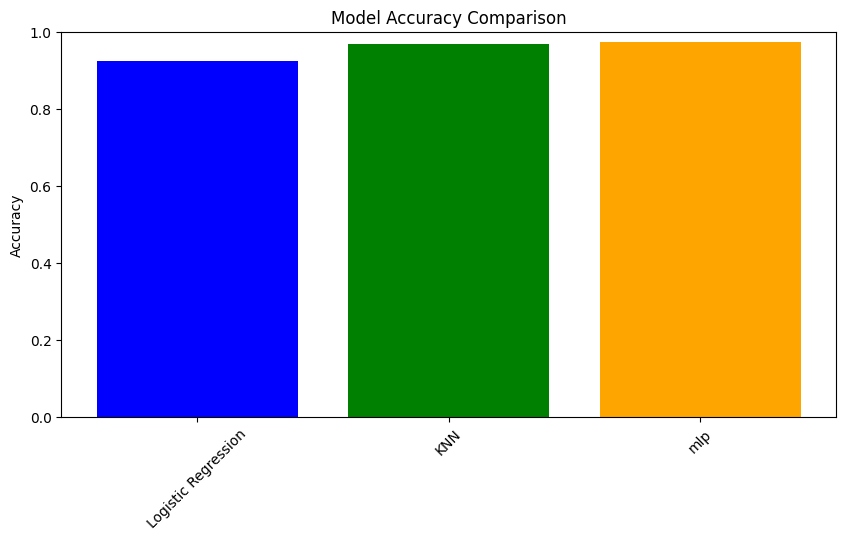

In [72]:
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange', 'red'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Save the plot as an image
plt.savefig('model_accuracy_comparison.png', dpi=300, bbox_inches='tight')

plt.show()

### Conclusion & Insights

#### Model Performance:
- The accuracy of different models was compared using a bar chart.
- All models performed well, with **MLP** achieving the highest accuracy, followed closely by **KNN** and **Regression**.

#### Key Observations:
- **MLP (Multi-Layer Perceptron)** performed the best, indicating that a deep learning approach captured complex patterns more effectively.
- **KNN** also achieved high accuracy, which suggests that the dataset might have well-separated classes.
- **Regression**, while slightly lower in accuracy, still provided a strong baseline.

#### Recommendations & Future Improvements:
- Further **hyperparameter tuning** (e.g., adjusting layers in MLP, choosing optimal k in KNN) could enhance accuracy.
- Exploring **ensemble models** (e.g., combining MLP and KNN) might yield even better results.
- Testing on a **larger dataset** or adding **feature engineering** could improve generalization.

* MLP is the **best-performing model** for this classification task. However, depending on computational constraints, **KNN can also be a good alternative**.
